### Nama  : Hadie Pratama Tulili ###
### NIM   : 2109106043 ###
### Kelas : Informatika A 21 ###

# <center><br>UTS PROBABILITAS DAN STATISTIKA</center><br> #

## Import Library Yang Dibutuhkan
[NumPy](https://numpy.org/) | [Pandas](https://pandas.pydata.org/) | [Matplotlib](https://matplotlib.org/) | [Seaborn](https://seaborn.pydata.org/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Menampilkan Dataset

In [3]:
df = pd.read_csv("./Dr.-Fahrul-Agus,MT_Dr.-Fahrul-Agus,MT_StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Tipe data dari setiap variabel

In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

## Buat Tabel Distribusi Frekuensi dan Histogram Variabe reading_score dan writing_score dengan jumlah dan lebar interval sebesar 10.

### Tabel Distribusi Frekuensi

In [5]:
def tabel_distribusi_frekuensi(data):
    nilai_terkecil = 0
    nilai_terbesar = data[len(data)-1]
    bins = []
    
    i = nilai_terkecil
    while True:
        if i < nilai_terbesar:
            bins.append(i)
        else:
            bins.append(i)
            break
        i += 10
    
    data_bins = pd.cut(data, bins=bins)

    distribusi_frekuensi = pd.DataFrame(data_bins.value_counts().sort_index().rename("frekuensi")).reset_index()
    return distribusi_frekuensi.rename(columns={"index": "interval"})

#### a) Reading Score

In [6]:
data_readScore  = df["reading_score"].sort_values().reset_index(drop=True)
table_readScore = tabel_distribusi_frekuensi(data_readScore)
table_readScore

,interval,frekuensi
0,"(0, 10]",0
1,"(10, 20]",1
2,"(20, 30]",7
3,"(30, 40]",19
4,"(40, 50]",70
5,"(50, 60]",178
6,"(60, 70]",238
7,"(70, 80]",252
8,"(80, 90]",173
9,"(90, 100]",62


#### b) Writing Score

In [7]:
data_writeScore  = df["writing_score"].sort_values().reset_index(drop=True)
table_writeScore = tabel_distribusi_frekuensi(data_writeScore)
table_writeScore

,interval,frekuensi
0,"(0, 10]",1
1,"(10, 20]",2
2,"(20, 30]",7
3,"(30, 40]",25
4,"(40, 50]",89
5,"(50, 60]",177
6,"(60, 70]",243
7,"(70, 80]",248
8,"(80, 90]",140
9,"(90, 100]",68


## Diagram Histogram

#### a) Reading Score

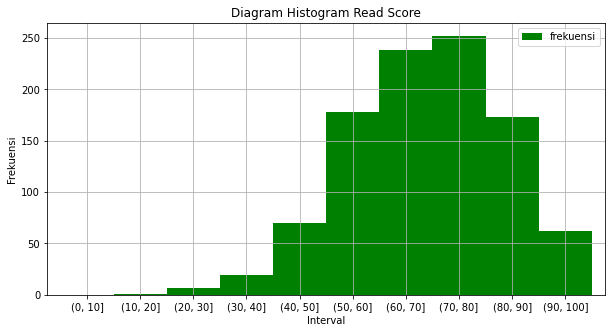

In [8]:
histogram_readScore = table_readScore.plot(kind='bar', align='center', width=1.0, figsize=(10,5),color='green', grid=True)
histogram_readScore.set_xticks(np.arange(len(table_readScore)))
histogram_readScore.set_xticklabels(table_readScore['interval'], rotation=0)
histogram_readScore.set_xlabel("Interval")
histogram_readScore.set_ylabel("Frekuensi")
histogram_readScore.set_title("Diagram Histogram Read Score")
plt.show()

#### b) Writing Score

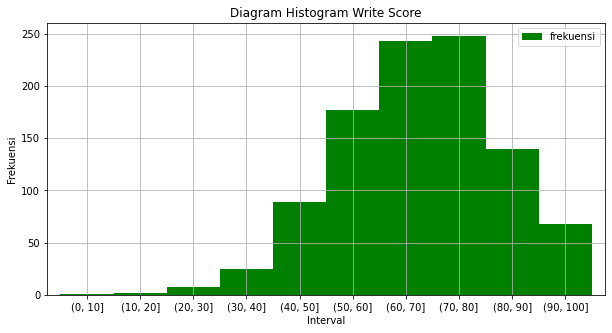

In [9]:
histogram_writeScore = table_writeScore.plot(kind='bar', align='center', width=1.0, figsize=(10,5),color='green',grid=True)
histogram_writeScore.set_xticks(np.arange(len(table_writeScore)))
histogram_writeScore.set_xticklabels(table_writeScore['interval'], rotation=0)
histogram_writeScore.set_xlabel("Interval")
histogram_writeScore.set_ylabel("Frekuensi")
histogram_writeScore.set_title("Diagram Histogram Write Score")
plt.show()

##  Tentukan nilai Tendensi Central: Rata-rata, Median, Modus, Min dan Max data kedua variable tersebut.

#### a) Reading Score

In [10]:
def mode(numbers):
    mode = [0, 0]
    for num in numbers:
        frequency = numbers.count(num)
        if (frequency >= mode[1]):
            mode = [num, frequency]
    return mode[0]

In [11]:
print("Rata-rata          : " + str(df['reading_score'].mean()))
print("Median             : " + str(df['reading_score'].median()))
print("Modus              : " + str(mode(df['reading_score'].tolist())))
print("Min                : " + str(df['reading_score'].min()))
print("Max                : " + str(df['reading_score'].max()))

Rata-rata          : 69.169
Median             : 70.0
Modus              : 72
Min                : 17
Max                : 100


#### b) Writing Score

In [12]:
print("Rata-rata          : " + str(df['writing_score'].mean()))
print("Median             : " + str(df['writing_score'].median()))
print("Modus              : " + str(mode(df['writing_score'].tolist())))
print("Min                : " + str(df['writing_score'].min()))
print("Max                : " + str(df['writing_score'].max()))

Rata-rata          : 68.054
Median             : 69.0
Modus              : 74
Min                : 10
Max                : 100


## Tentukan nilai Variasi: Jangkauan Range, Kisaran Interkuartil, Varians, Standar Deviasi data reading_score dan writing_score.

#### a) Reading Score

In [13]:
print("Jangkauan Range      : " + str(df['reading_score'].max() - df['reading_score'].min()))
print("Kuartil Bawah (Q1)   : " + str(df['reading_score'].quantile(0.25)))
print("Kuartil Tengah (Q2)  : " + str(df['reading_score'].quantile(0.50)))
print("Kuartil Atas (Q3)    : " + str(df['reading_score'].quantile(0.75)))
print("Varians              : " + str(df['reading_score'].var()))
print("Standar Deviasi      : " + str(df['reading_score'].std()))

Jangkauan Range      : 83
Kuartil Bawah (Q1)   : 59.0
Kuartil Tengah (Q2)  : 70.0
Kuartil Atas (Q3)    : 79.0
Varians              : 213.16560460460462
Standar Deviasi      : 14.600191937252216


#### b) Writing Score

In [14]:
print("Jangkauan Range      : " + str(df['writing_score'].max() - df['writing_score'].min()))
print("Kuartil Bawah (Q1)   : " + str(df['writing_score'].quantile(0.25)))
print("Kuartil Tengah (Q2)  : " + str(df['writing_score'].quantile(0.50)))
print("Kuartil Atas (Q3)    : " + str(df['writing_score'].quantile(0.75)))
print("Varians              : " + str(df['writing_score'].var()))
print("Standar Deviasi      : " + str(df['writing_score'].std()))

Jangkauan Range      : 90
Kuartil Bawah (Q1)   : 57.75
Kuartil Tengah (Q2)  : 69.0
Kuartil Atas (Q3)    : 79.0
Varians              : 230.907991991992
Standar Deviasi      : 15.19565701086965


## Buat Grafik data Variabel reading_score dan writing_score: Histogram, BOX PLOT, dan Tentukan Nilai Skewness dan Kurtosis. Buat interpretasi saudara tentang perbedaan distribusi kedua variable tersebut, terutama pada gambar BOX PLOT dan nilai Skewness - Kurtosisnya.

## Histogram

#### a) Reading Score

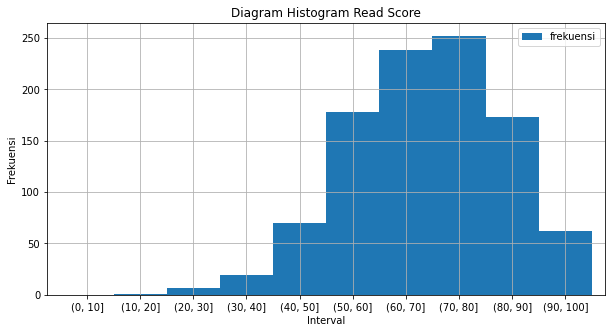

In [15]:
histogram_readScore = table_readScore.plot(kind='bar', align='center', width=1.0, figsize=(10,5), grid=True)
histogram_readScore.set_xticks(np.arange(len(table_readScore)))
histogram_readScore.set_xticklabels(table_readScore['interval'], rotation=0)
histogram_readScore.set_xlabel("Interval")
histogram_readScore.set_ylabel("Frekuensi")
histogram_readScore.set_title("Diagram Histogram Read Score")
plt.show()

#### b) Writing Score

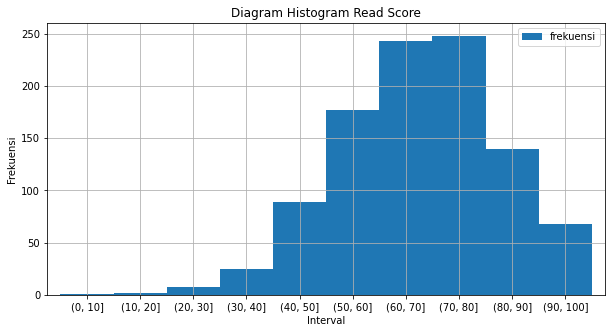

In [16]:
histogram_readScore = table_writeScore.plot(kind='bar', align='center', width=1.0, figsize=(10,5), grid=True)
histogram_readScore.set_xticks(np.arange(len(table_writeScore)))
histogram_readScore.set_xticklabels(table_writeScore['interval'], rotation=0)
histogram_readScore.set_xlabel("Interval")
histogram_readScore.set_ylabel("Frekuensi")
histogram_readScore.set_title("Diagram Histogram Read Score")
plt.show()

## Boxplot

#### a) Reading Score

<AxesSubplot: >

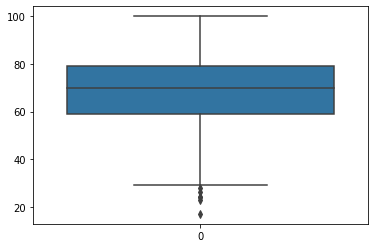

In [17]:
sns.boxplot(df["reading_score"], orient="v")

#### b) Writing Score

<AxesSubplot: >

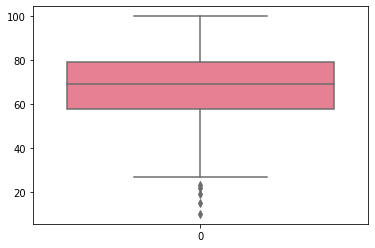

In [18]:
sns.boxplot(df["writing_score"], orient="v", palette=("husl"))

### Skewness

In [19]:
print("Reading Score : " + str(df['reading_score'].skew()))
print("Writing Score : " + str(df['reading_score'].kurtosis()))

Reading Score : -0.25910451810923063
Writing Score : -0.0682654585647704


### Kurtosis

In [20]:
print("Reading Score : " + str(df['writing_score'].skew()))
print("Writing Score : " + str(df['writing_score'].kurtosis()))

Reading Score : -0.28944397150761897
Writing Score : -0.03336461500693577


## Buat scater plot antara writing_score (dependent variable-Y) versus reading_score (independent variable-X). Tulis interpretasi saudara apakah ada indikasi hubungan liear antar keduanya.

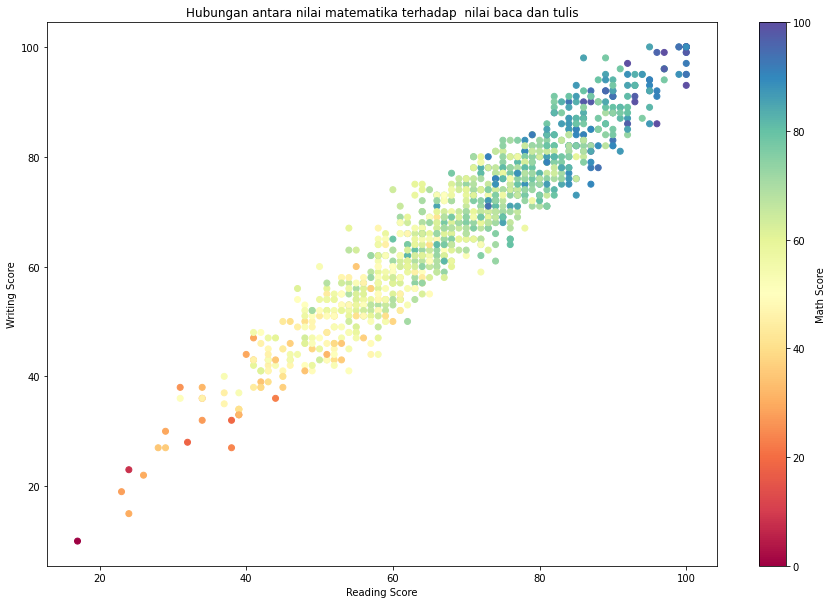

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(df['reading_score'],df['writing_score'],c=df['math_score'], cmap='Spectral')
plt.colorbar().set_label("Math Score")
plt.title('Hubungan antara nilai matematika terhadap  nilai baca dan tulis')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()